In [3]:
class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K=K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    # cluster info
    self.clusters = [[] for _ in range(self.K)]
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize centroids
    random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
    self.centroids = [self.X[i] for i in random_sample_indices]

    # optimization
    for _ in range(self.max_iters):
      # update clusters
      self.clusters = self._create_clusters(self.centroids)

      # update centroids
      centorids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)
 
      # check convergence
      convergence_distances = [self.euclidean_distance(centorids_old[i], self.centroids[i]) for i in range(self.K)]
      if sum(convergence_distances) == 0:
        break

    # return cluster labels
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(self.clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels

  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      distances = [self.euclidean_distance(sample, c) for c in self.centroids]
      centroid_idx = np.argmin(distances)
      clusters[centroid_idx].append(idx)
    return clusters

  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids
  
  def euclidean_distance(self, x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

(500, 2)
4


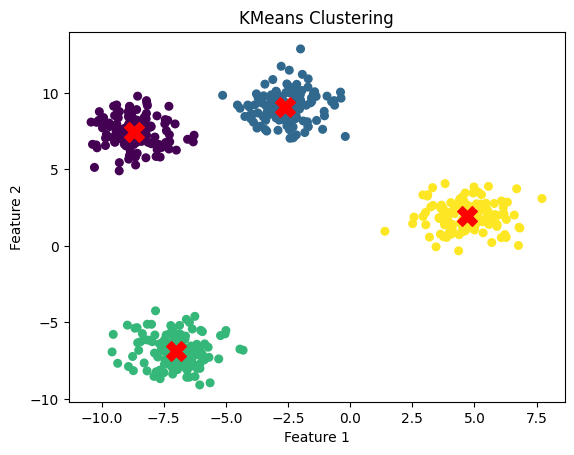

In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
print(X.shape)
clusters = len(np.unique(y))
print(clusters)


k = KMeans(K=clusters, max_iters=150)
y_pred = k.predict(X)

#plotting
plt.scatter(X[:, 0], X[:, 1], s=30, c=y_pred, cmap='viridis')
centroids = k.centroids 
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()